<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [5]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [9]:
image = np.array(Image.open('Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





(100, 100, 3)
[[ 3  3  3 ...  3  3  3]
 [ 3  3  3 ...  3  3  3]
 [ 3  3  3 ...  3  3  3]
 ...
 [10 10 11 ... 27 27 26]
 [12 12 13 ... 29 30 28]
 [13 14 14 ... 32 33 32]]
(100, 100)


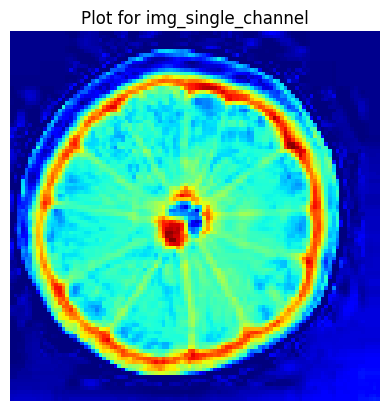

In [12]:
# 1. Image shape 
image_shape = image.shape
print(image_shape)

# 2. Last color channel of Image
img_single_channel = image[:, :, 2]

print(img_single_channel)

# 3. Shape of the img_single_channel

img_single_channel_shape = img_single_channel.shape
print(img_single_channel_shape)

# 4. plot for img_single_channel

plt.imshow(img_single_channel, cmap='jet')
plt.title("Plot for img_single_channel")
plt.axis('off')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


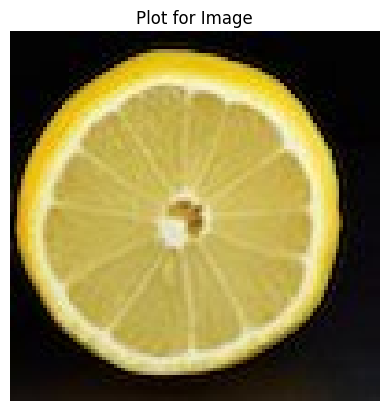

In [13]:
# 1. img_average_channel avg. of all three color channels

img_average_channel = np.mean(image, axis=2)

# 2. shape of the img_average_channel
print(img_average_channel.shape)

# 3. Plot for Image

plt.imshow(image, cmap='jet')
plt.title("Plot for Image")
plt.axis('off')
plt.show()

''' The main difference between plot for image and plot for img_single_channel :-
 The original image (Part 1) will likely appear in full color, while the average channel image (Part 2) will be grayscale 
 since it represents the average brightness of the original image. '''

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [20]:
''' 1. Identity matrix definition: Identity matrix is a matrix where number of rows and columns are equal. 
 Also diagnol elements are equal to 1 and remaining other elements are equal to 0. When we try to multiply a matrix with identity matrix
 then the result will be the same as original matrix (A . I = A). '''

# 2. Creating identity matrix with same size of img_average_channel
rows, cols = img_average_channel.shape

identity_matrix = np.eye(rows, cols)

print(identity_matrix.shape)

# 3. Printing the random row out of identity_matrix
print(identity_matrix[77])

# I observe that 77th row prints only one 1 at the last but one row. Remaining every column are filled with 0's.

(100, 100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [22]:
# storing the number of rows
image_rows = image.shape[0]

# creating an numoy array
rows = np.arange(image_rows)

# shuffle the array and store in 'row'
np.random.shuffle(rows)

# print the row
print(rows)

# Obv : Array rows are shuffled randomly from 0 to 100


[38 65 28 87 77 18 76 84 12 78 72  6 34 29 51 57 68 92 14 61 17  9 97 30
  5 22 25 37 86 79 66 35 54 33 88 15 21 98 67 64 23  1 45 26 44 36  2 73
 16 59 52  0 91 41 24 50 69  3 11 90 10 80 47 43 27 19 83 40 56 32 60 74
 75 93 95 49 13 89 71 82 62 85 42 31 58 39  4 70 81 48 46 53 94 63  7 20
  8 99 55 96]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [17]:
# matrix T

# 1. creating matrix T from the identity_matrix which contains same elements as identity_matrix
T = identity_matrix[rows]

''' 2. Matrix T contains the rows as defined the array 'rows', It contains element '1' in the column where the array 'row' elements 
 are arranged. For example if first element of 'row' array has element '2', then the Matrix T contain a row with all 0's except column 2 
 value is '1'. '''

# 3. print of the T matrix
print(T.shape)

(100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

(100, 100)


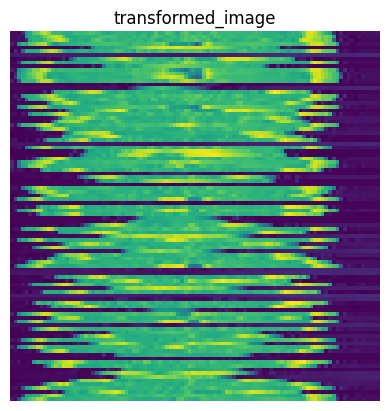

" 3. dot product for matrix multiplication \n Each dot product in the matrix multiplication corresponds to a weighted combination of rows \n    in img_average_channel. By shuffling the rows, this transformation rearranges the pixel values in the \n    output image, resulting in a scrambled version of the original image. It's a form of pixel-level scrambling or permutation. "

In [27]:
# 1. multiplication of T and img_average_channel and print the shape of the transformed_image

transformed_image = T@img_average_channel
print(transformed_image.shape)

# 2. plot the transformed_image
plt.imshow(transformed_image)
plt.title("transformed_image")
plt.axis('off')
plt.show()

''' 3. dot product for matrix multiplication 
 Each dot product in the matrix multiplication corresponds to a weighted combination of rows 
    in img_average_channel. By shuffling the rows, this transformation rearranges the pixel values in the 
    output image, resulting in a scrambled version of the original image. It's a form of pixel-level scrambling or permutation. '''

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

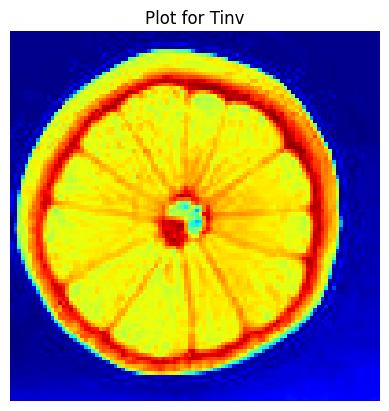

In [28]:
''' 1. Explain T is invertible ??
To determine if matrix T is invertible, you need to check whether it's a square matrix and 
if its determinant is nonzero. A square matrix is invertible if and only if its determinant is nonzero.
If T is invertible, you can find its inverse matrix T^(-1), and then you can use T^(-1) to retrieve the original image. '''

# 2. Tinv matrix
Tinv = np.linalg.inv(T)
get_original = Tinv @ transformed_image

# 3. plotting the result to show original image
plt.imshow(get_original, cmap='jet')
plt.title("Plot for Tinv")
plt.axis('off')
plt.show()

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


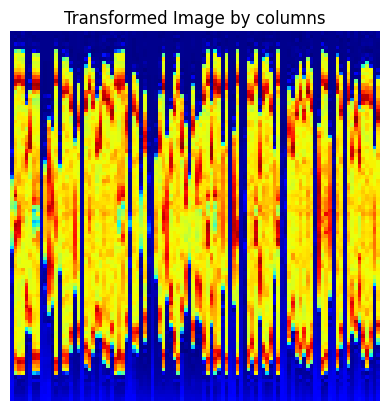

In [35]:
# Do the transpose of the img_average_channel
img_avg_channel_transpose = np.transpose(img_average_channel)

# Transpose of T
T_tp = np.transpose(T)

# transform the image based on the Columns
transformed_image_cols = np.matmul(T_tp, img_avg_channel_transpose)

# Transpose the transformed Image
transformed_image_cols = np.transpose(transformed_image_cols)

# Plotting the transformed Image by Columns
plt.imshow(transformed_image_cols, cmap='jet')
plt.title("Transformed Image by columns")
plt.axis('off')
plt.show()


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

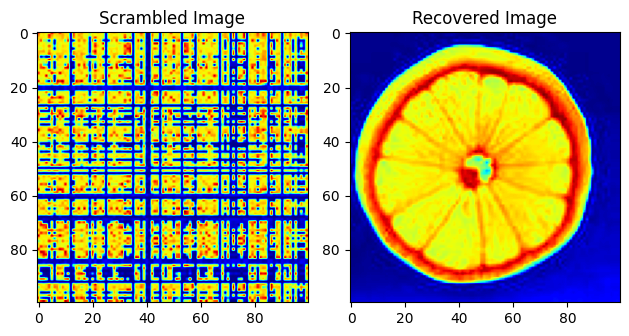

In [36]:
import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = img_average_channel.shape

row_indices = np.arange(n_rows)
col_indices = np.arange(n_cols)

np.random.shuffle(row_indices)
np.random.shuffle(col_indices)

rows = np.eye(n_rows)[row_indices]
cols = np.eye(n_cols)[col_indices]

rows_inv = np.linalg.inv(rows)
cols_inv = np.linalg.inv(cols)

scrambled_image = (rows @ img_average_channel) @ cols

# Scramble the image
# scrambled_image = scramble_image(img_average_channel)

# Unscramble the image
unscrambled_image = ((rows_inv @ scrambled_image) @ cols_inv)
# unscrambled_image = unscramble_image(scrambled_image, img_average_channel.shape)

# Display the results
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image, cmap='jet')
plt.title('Scrambled Image')
plt.subplot(1, 2, 2)
plt.imshow(unscrambled_image, cmap='jet')
plt.title('Recovered Image')
plt.tight_layout()
plt.show()
